In [1]:
import pandas as pd
import  sys 
sys.path.append("../src/")
import data_preparation as dp

In [2]:
train = pd.read_csv("../data/train.csv")

/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_4922/2794332508.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("../data/train.csv")


In [3]:
test = pd.read_csv("../data/test.csv")

/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_4922/2327594477.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("../data/test.csv")


In [4]:
train = train.drop(columns=['MMS', 'Vf', 'De', 'Ernedc (g/km)', 'Enedc (g/km)', 'z (Wh/km)', 'Erwltp (g/km)', 'r' , 'Status'])

In [5]:
test = test.drop(columns=['MMS', 'Vf', 'De', 'Ernedc (g/km)', 'Enedc (g/km)', 'z (Wh/km)', 'Erwltp (g/km)', 'r' , 'Status'])

In [6]:
train['Electric range (km)'].fillna(0, inplace=True)
test['Electric range (km)'].fillna(0, inplace=True)

In [7]:
exp = dp.DataPreparation(train, test)

In [8]:
exp.get_type_list()

In [9]:
exp.impute_train_test_numerical()

/Users/axel/Documents/École/Université/M2/M2_S1/Data_Mining/ChallengeKaggle/venv/lib/python3.10/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


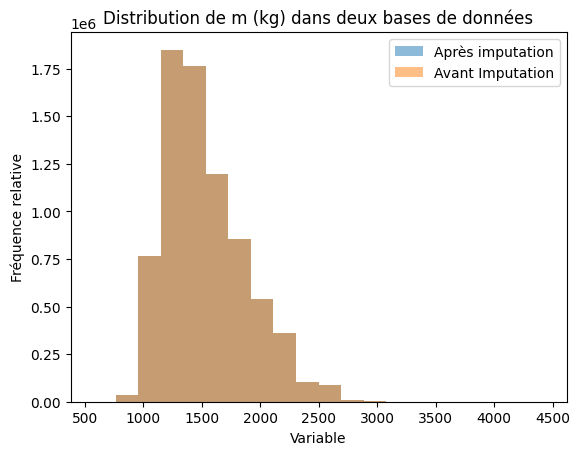

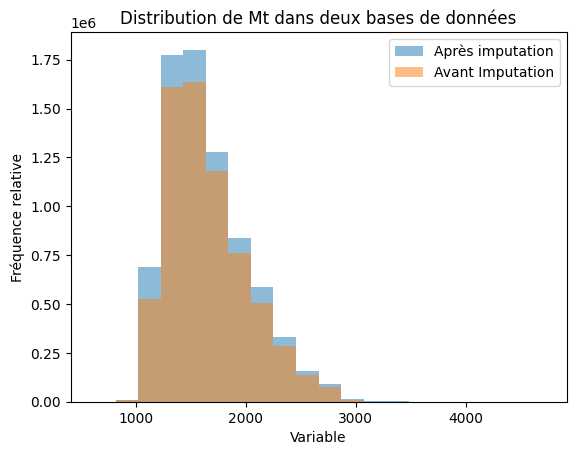

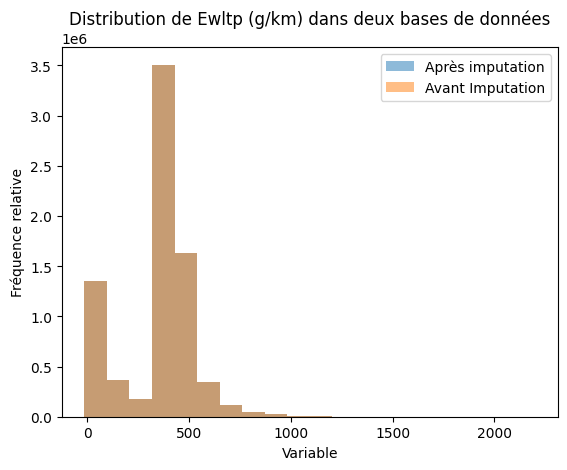

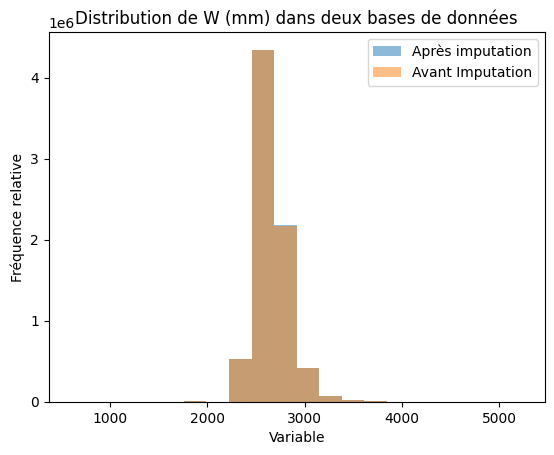

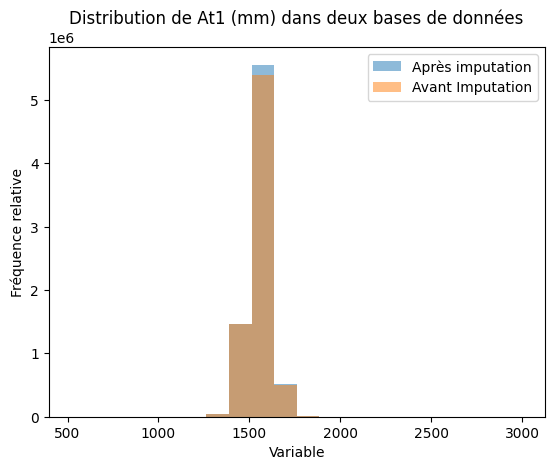

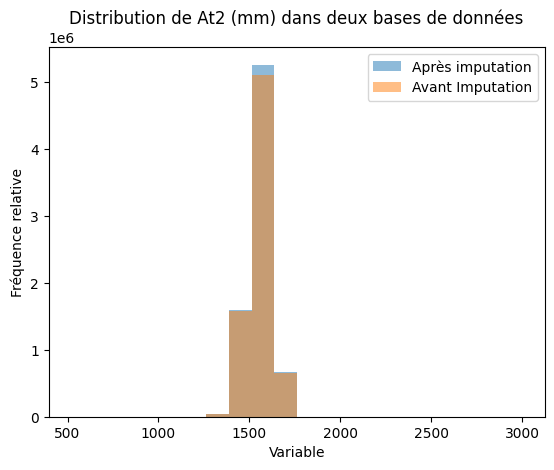

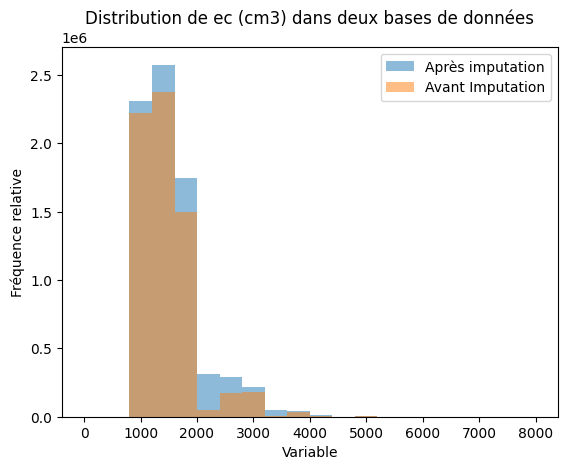

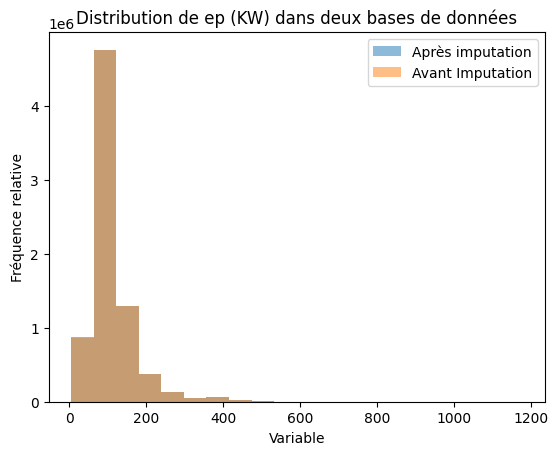

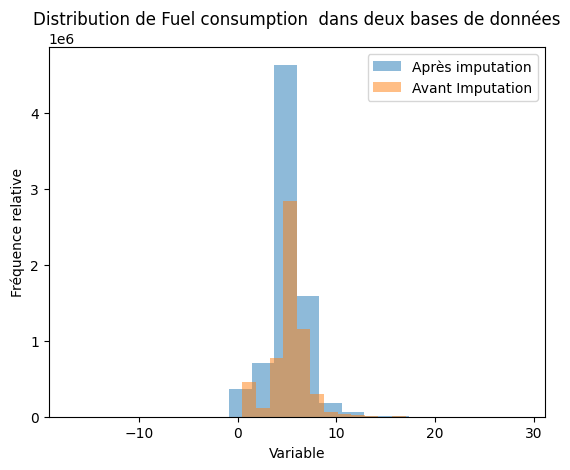

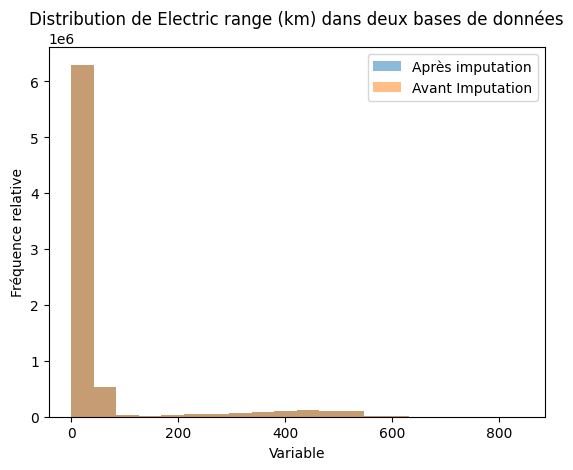

In [10]:
from matplotlib import pyplot as plt

for var in train[exp.col_numericals].columns : 
    plt.hist(exp.train[var], bins=20, alpha=0.5, label='Après imputation')
    
    # Créer un histogramme pour la deuxième base de données
    plt.hist(train[var], bins=20, alpha=0.5, label='Avant Imputation')
    
    # Personnaliser le graphique
    plt.title(f'Distribution de {var} dans deux bases de données')
    plt.xlabel('Variable')
    plt.ylabel('Fréquence relative')
    plt.legend()
    
    # Afficher le graphique
    plt.show()